In [ ]:
import numpy as np
from IPython.display import display, Markdown
from lxml import etree

In [ ]:
from tixi3 import tixi3wrapper

In [ ]:
def validate():
    xml_file = etree.fromstring(tixi_h.exportDocumentAsString())
    xsd_file = etree.parse("./resources/cpacs_schema.xsd")
    xmlschema = etree.XMLSchema(xsd_file)
    try:
        xmlschema.assertValid(xml_file)
        print("XML file is valid.")
    except etree.DocumentInvalid as e:
        print("XML file is not valid.")
        error_line = e.error_log[-1].line
        error_message = str(e)
        print("Validation error on line:", error_line)
        print("Error message:", error_message)

In [ ]:
def plotXML(s):
    formatted_string = f'```\n{s}\n```'
    display(Markdown(formatted_string))

In [ ]:
def saveIntermediate(tixi_h):
    s = tixi_h.exportDocumentAsString()
    with open("wing.xml","w") as f:
        f.write(s)
        f.close()

## Create a TiXI instance

In [ ]:
tixi_h = tixi3wrapper.Tixi3()

## Create a new CPACS data set

We need a header with the namespace attributes and CPACS schema location, as shown below:

```XML
<cpacs xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" 
       xsi:noNamespaceSchemaLocation="https://www.cpacs.de/schema/v3_4_0/cpacs_schema.xsd">
```

In [ ]:
tixi_h.create("cpacs")
tixi_h.declareNamespace("/cpacs","http://www.w3.org/2001/XMLSchema-instance","xsi")
tixi_h.addTextAttribute("/cpacs","xsi:noNamespaceSchemaLocation","./resources/cpacs_schema.xsd")

In [ ]:
s = tixi_h.exportDocumentAsString()
plotXML(s)

Let's validate the result. It should be invalid, as the `header` element is missing.

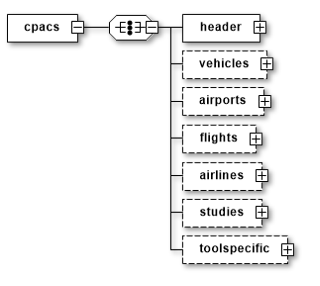

In [ ]:
validate()

## Create the header

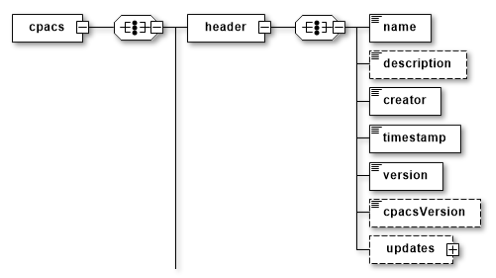

In [ ]:
import datetime
timestamp = datetime.datetime.now()
formatted_timestamp = timestamp.strftime("%Y-%m-%dT%H:%M:%S")

In [ ]:
#help(tixi_h)

In [ ]:
tixi_h.createElement("/cpacs","header")
tixi_h.addTextElement("/cpacs/header","name","wingExample")
tixi_h.addTextElement("/cpacs/header","creator","Marko")
tixi_h.addTextElement("/cpacs/header","timestamp",formatted_timestamp)
tixi_h.addTextElement("/cpacs/header","version","1.0")
tixi_h.addTextElement("/cpacs/header","cpacsVersion","3.4")

In [ ]:
s = tixi_h.exportDocumentAsString()
plotXML(s)

In [ ]:
validate()

## Create profile data

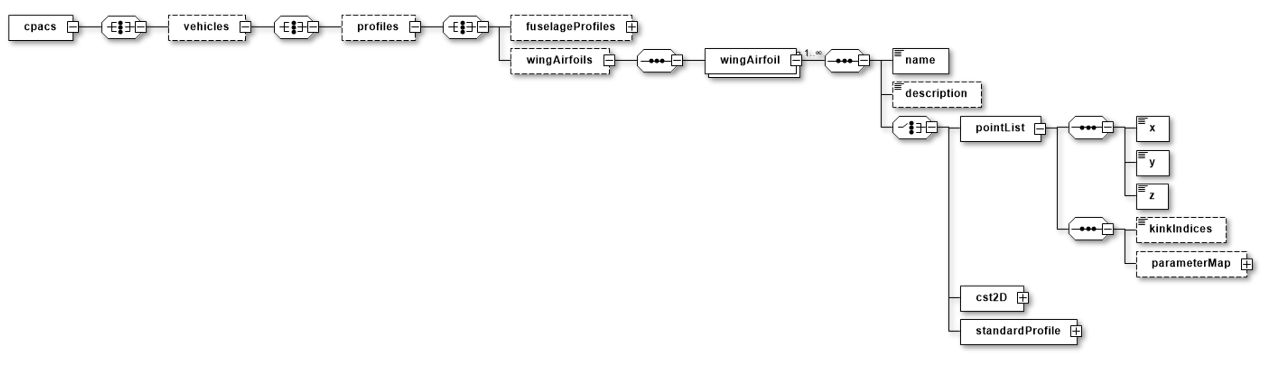

In [ ]:
x = [1.0,0.99572,0.98296,0.96194,0.93301,0.89668,0.85355,0.80438,0.75,0.69134,0.62941,0.56526,0.5,0.43474,0.37059,0.33928,0.30866,0.27886,0.25,0.22221,0.19562,0.17033,0.14645,0.12408,0.10332,0.08427,0.06699,0.05156,0.03806,0.02653,0.01704,0.00961,0.00428,0.00107,0.0,0.00107,0.00428,0.00961,0.01704,0.02653,0.03806,0.05156,0.06699,0.08427,0.10332,0.12408,0.14645,0.17033,0.19562,0.22221,0.25,0.27886,0.30866,0.33928,0.37059,0.43474,0.5,0.56526,0.62941,0.69134,0.75,0.80438,0.85355,0.89668,0.93301,0.96194,0.98296,0.99572,1.0]
y = np.zeros(len(x))
z = [0.0,0.00057,0.00218,0.00463,0.0077,0.01127,0.01522,0.01945,0.02384,0.02823,0.03247,0.03638,0.03978,0.04248,0.04431,0.04484,0.04509,0.04504,0.04466,0.04397,0.04295,0.04161,0.03994,0.03795,0.03564,0.03305,0.03023,0.0272,0.02395,0.02039,0.01646,0.01214,0.00767,0.00349,0.0,-0.00349,-0.00767,-0.01214,-0.01646,-0.02039,-0.02395,-0.0272,-0.03023,-0.03305,-0.03564,-0.03795,-0.03994,-0.04161,-0.04295,-0.04397,-0.04466,-0.04504,-0.04509,-0.04484,-0.04431,-0.04248,-0.03978,-0.03638,-0.03247,-0.02823,-0.02384,-0.01945,-0.01522,-0.01127,-0.0077,-0.00463,-0.00218,-0.00057,0.0]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, z, 'k-', linewidth=2)
ax.grid(True)
ax.axis('equal')
ax.set_xlabel('x/c')
ax.set_ylabel('z/c')
ax.set_title('NACA0009')
plt.show()

In [ ]:
tixi_h.createElement("/cpacs","vehicles")
tixi_h.createElement("/cpacs/vehicles","profiles")
tixi_h.createElement("/cpacs/vehicles/profiles","wingAirfoils")
tixi_h.createElement("/cpacs/vehicles/profiles/wingAirfoils","wingAirfoil")

wingAirfoil_xPath = "/cpacs/vehicles/profiles/wingAirfoils/wingAirfoil[1]"
tixi_h.addTextElement(wingAirfoil_xPath,"name","NACA0009 Airfoil")
tixi_h.addTextAttribute(wingAirfoil_xPath,"uID","NACA0009")

tixi_h.createElement(wingAirfoil_xPath,"pointList")
pointList_xPath = wingAirfoil_xPath + "/pointList"
tixi_h.addFloatVector(pointList_xPath, "x", x, len(x), "%.5f")
tixi_h.addFloatVector(pointList_xPath, "y", y, len(y), "%.1f")
tixi_h.addFloatVector(pointList_xPath, "z", z, len(z), "%.5f")

In [ ]:
s = tixi_h.exportElementAsString(wingAirfoil_xPath)
plotXML(s)

In [ ]:
saveIntermediate(tixi_h)

In [ ]:
validate()

## Create Aircraft and Wing

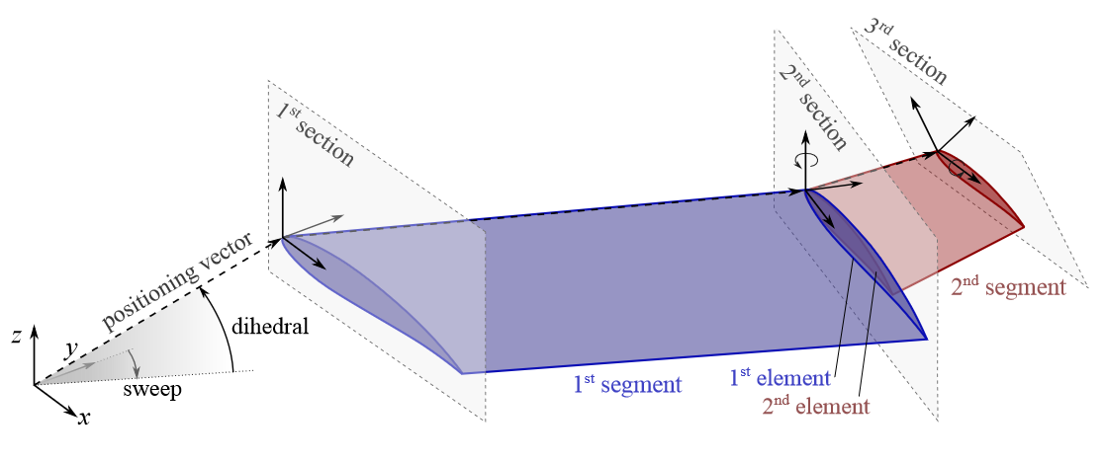

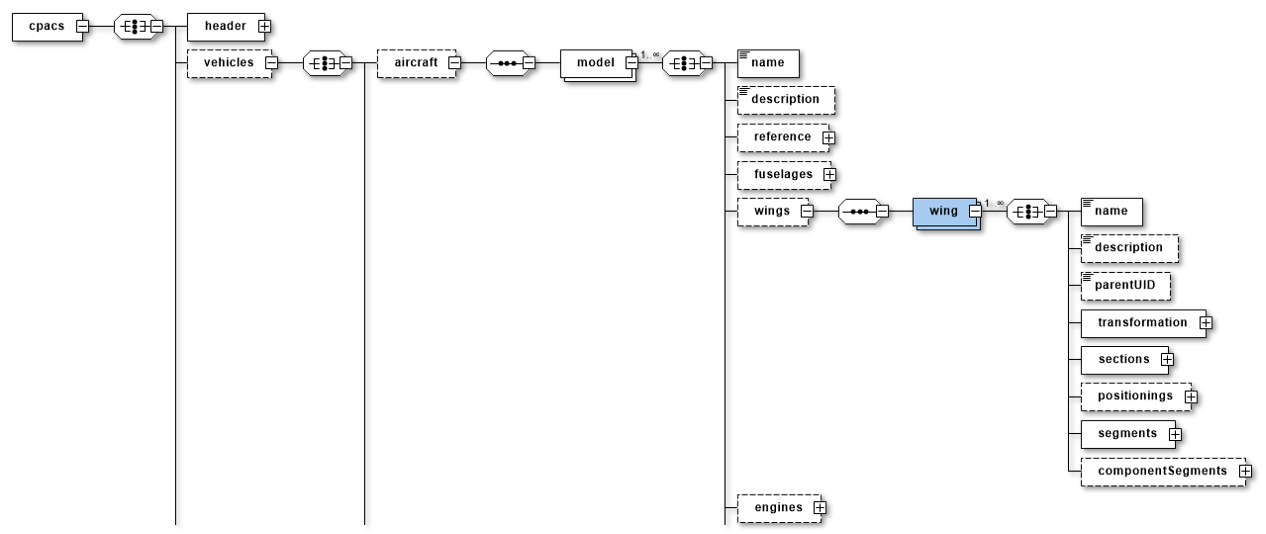

In [ ]:
tixi_h.createElement("/cpacs/vehicles","aircraft")
tixi_h.createElement("/cpacs/vehicles/aircraft","model")
tixi_h.addTextAttribute("/cpacs/vehicles/aircraft/model[1]","uID","aircraft")

In [ ]:
model_xPath = "/cpacs/vehicles/aircraft/model"
tixi_h.addTextElement(model_xPath,"name","myAircraft")

In [ ]:
tixi_h.createElement(model_xPath,"wings")
tixi_h.createElement(model_xPath+"/wings","wing")
tixi_h.addTextAttribute(model_xPath+"/wings/wing[1]","uID","wing1")
wing_xPath = model_xPath+"/wings/wing[1]"
tixi_h.addTextElement(wing_xPath,"name","Wing")

In [ ]:
saveIntermediate(tixi_h)

### Transformations

In [ ]:
tixi_h.createElement(wing_xPath,"transformation")

### Sections

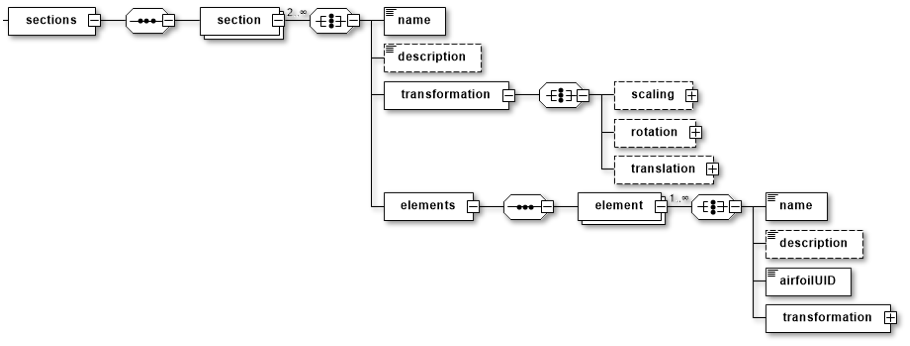

In [ ]:
tixi_h.createElement(wing_xPath,"sections")
tixi_h.createElement(wing_xPath+"/sections","section")
tixi_h.createElement(wing_xPath+"/sections","section")

tixi_h.addTextAttribute(wing_xPath+"/sections/section[1]","uID","wing1section1")
tixi_h.addTextAttribute(wing_xPath+"/sections/section[2]","uID","wing1section2")

tixi_h.addTextElement(wing_xPath+"/sections/section[1]","name","Section 1")
tixi_h.addTextElement(wing_xPath+"/sections/section[2]","name","Section 2")

tixi_h.createElement(wing_xPath+"/sections/section[1]","transformation")
tixi_h.createElement(wing_xPath+"/sections/section[2]","transformation")

In [ ]:
saveIntermediate(tixi_h)

In [ ]:
tixi_h.createElement(wing_xPath+"/sections/section[1]","elements")
tixi_h.createElement(wing_xPath+"/sections/section[1]/elements","element")
tixi_h.addTextAttribute(wing_xPath+"/sections/section[1]/elements/element[1]","uID","wing1section1element1")
tixi_h.addTextElement(wing_xPath+"/sections/section[1]/elements/element[1]","name","wing root element")
tixi_h.addTextElement(wing_xPath+"/sections/section[1]/elements/element[1]","airfoilUID","NACA0009")
tixi_h.createElement(wing_xPath+"/sections/section[1]/elements/element[1]","transformation")

In [ ]:
tixi_h.createElement(wing_xPath+"/sections/section[2]","elements")
tixi_h.createElement(wing_xPath+"/sections/section[2]/elements","element")
tixi_h.addTextAttribute(wing_xPath+"/sections/section[2]/elements/element[1]","uID","wing1section2element1")
tixi_h.addTextElement(wing_xPath+"/sections/section[2]/elements/element[1]","name","wing tip element")
tixi_h.addTextElement(wing_xPath+"/sections/section[2]/elements/element[1]","airfoilUID","NACA0009")
tixi_h.createElement(wing_xPath+"/sections/section[2]/elements/element[1]","transformation")

In [ ]:
saveIntermediate(tixi_h)

### Positionings

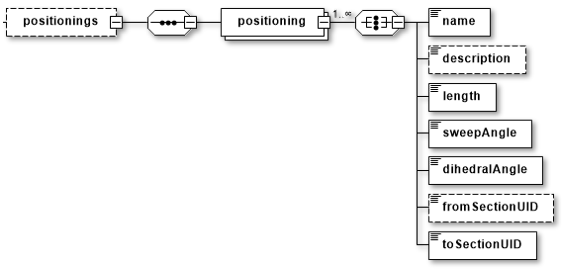

In [ ]:
tixi_h.createElement(wing_xPath,"positionings")
tixi_h.createElement(wing_xPath+"/positionings","positioning")
tixi_h.addTextAttribute(wing_xPath+"/positionings/positioning[1]","uID","wingTipPos")

tixi_h.addTextElement(wing_xPath+"/positionings/positioning[1]","name","Tip position")
tixi_h.addDoubleElement(wing_xPath+"/positionings/positioning[1]","length",1.0,"%.1f")
tixi_h.addDoubleElement(wing_xPath+"/positionings/positioning[1]","sweepAngle",0.,"%.1f")
tixi_h.addDoubleElement(wing_xPath+"/positionings/positioning[1]","dihedralAngle",0.,"%.1f")

tixi_h.addTextElement(wing_xPath+"/positionings/positioning[1]","toSectionUID","wing1section2")

In [ ]:
saveIntermediate(tixi_h)

### Segments

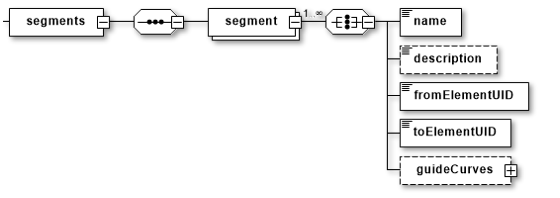

In [ ]:
tixi_h.createElement(wing_xPath,"segments")
tixi_h.createElement(wing_xPath+"/segments","segment")
tixi_h.addTextAttribute(wing_xPath+"/segments/segment[1]","uID","wing1segment1")

tixi_h.addTextElement(wing_xPath+"/segments/segment[1]","name","Wing segment")
tixi_h.addTextElement(wing_xPath+"/segments/segment[1]","fromElementUID","wing1section1element1")
tixi_h.addTextElement(wing_xPath+"/segments/segment[1]","toElementUID","wing1section2element1")

In [ ]:
saveIntermediate(tixi_h)

## Show the result

In [ ]:
from OCC.Display.WebGl.jupyter_renderer import JupyterRenderer
from tigl3 import tigl3wrapper
import tigl3.configuration

In [ ]:
tigl_h = tigl3wrapper.Tigl3()
tigl_h.open(tixi_h,"")

In [ ]:
mgr = tigl3.configuration.CCPACSConfigurationManager_get_instance()
aircraft_config = mgr.get_configuration(tigl_h._handle.value)
wing = aircraft_config.get_wing(1)
wing_shape = wing.get_loft()

In [ ]:
print("Wing span: %.2fm"%wing.get_wingspan())

In [ ]:
renderer = JupyterRenderer(size=(700,700))
renderer.DisplayShape(wing_shape.shape(), transparency=True,render_edges=True)
renderer.Display()

## Save to file

In [ ]:
tixi_h.save("wing.xml")

In [ ]:
help(tixi_h)